<h1><center>Reichman University</center></h1>
<h1><center>Master in Financial Economics</center></h1>
<h1><center>Final Project Draft E26</center></h1>
<h1><center>Rodrigo Medina Fernandez</center></h1>
<h1><center>October 2022</center></h1>
<br>


# Index


### 1.Research Question and Rationale
***

### 2.Data Sets
***

### 3.Methodologies
***

### 4.Implementation
***

### 5.Graphs and Conclusions

<br>
<br>

In [89]:
from IPython.display import display

<h1><center> 1. Research Question</center></h1>

<h3><center> Is there a quantifiable persistent relationship between factors that model the <br> <br>five competitive forces that shape strategy described by Prof. Michael Porter <br> <br>and returns at  the industry level?</center></h3>
<br>
      <br>

<left>Prof. Michael Porter´s contributions to the study of strategy among its many findings conclude that the level of profitability in an industry depends on the five forces that shape industry competition, this five-force framework will be used as the base for this project in order to analyze returns on industry portfolios formed on the different characteristics that affect profitability within an industry. <br> <br>
Prof. Porter´s work has shown that in order to understand what drives profitability within a company it is not enough to analyze the internal situation of the company, but also it is necessary to analyze the whole industry in which the company operates as each industry operates within a profitability level which depends on all the participants involved in that industry: current competitors, suppliers, consumers, regulation and the threats of new competitors and substitutes. </left>
   <br>
      <br>



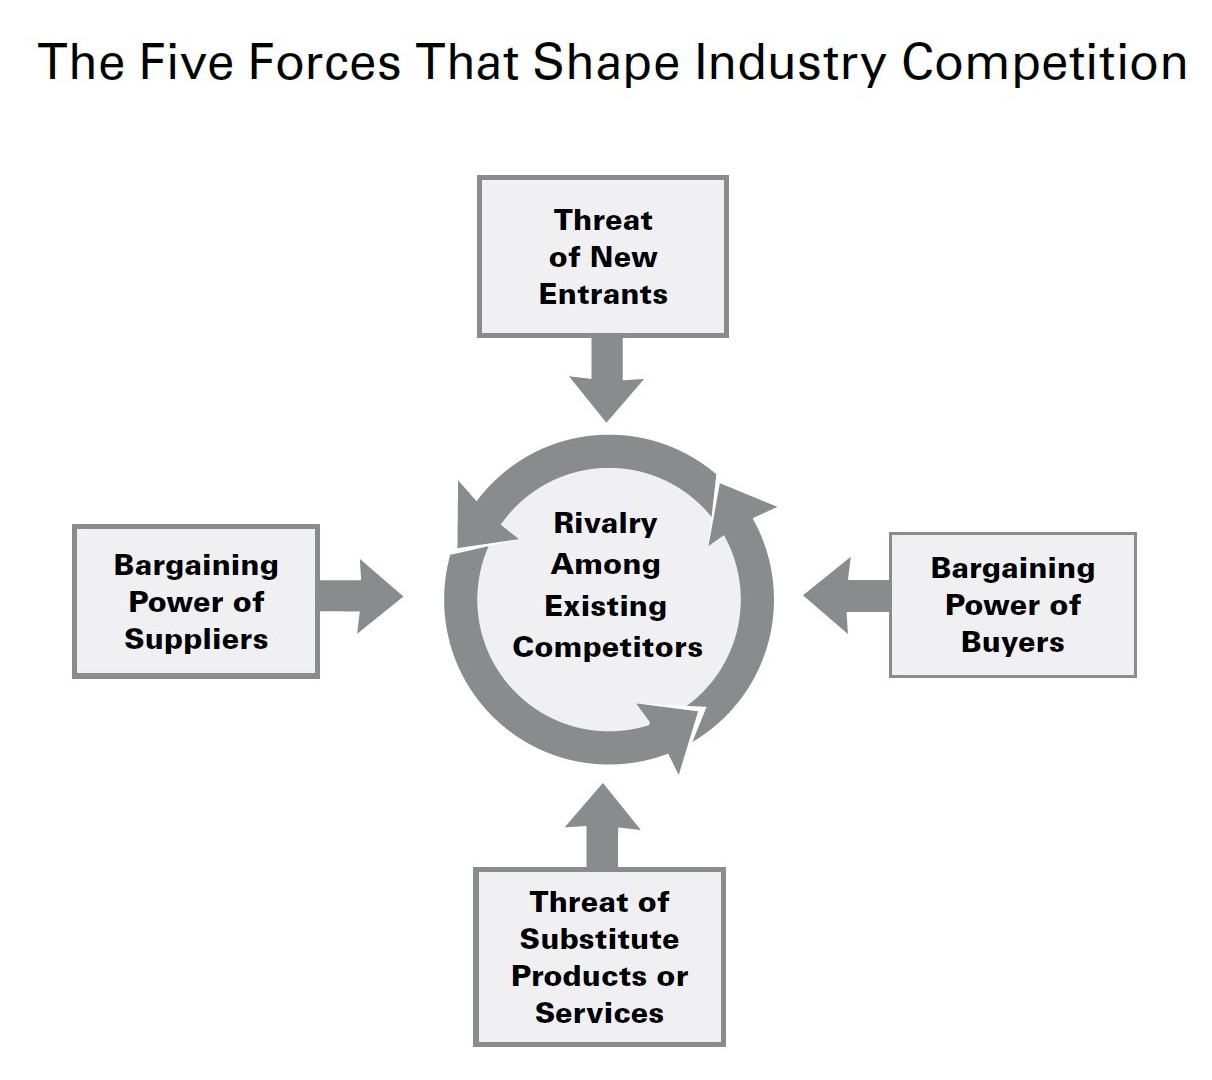

In [92]:
w = Image(filename='Five Forces.jpg')
display(w)

<h1><center>2.1 Data Sources</center></h1>
     <br>     <br>
<h3><left> Kenneth R. French - Data Library - 49 Industry Portfolios - Monthly Data</left></h3>      <br>     <br>
<h3><left>  https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html</left>  </h3>    <br>     <br>


<h1><center>2.2 Dataset Decription</center></h1>
     <br>     <br>
<left> <b>49_Ind_P_Monthly_Rets_Val_W.csv = </b>Data Frame of Value Weigthed Monthly Returns for 49 industries from July 1926 to August 2022  </left>     <br>     <br>

<left><b> 49_Ind_P_Monthly_Rets_EQ_W.csv = </b>Data Frame of Equal Weigthed Monthly Returns for 49 industries from July 1926 to August 2022  </left>     <br>     <br>

<left><b> 49_Ind_P_Monthly_Number_of_Firms.csv = </b>Data Frame of Number of Firms by Industry by Month for 49 industries from July 1926 to August 2022  </left>     <br>     <br>


<left><b> 49_Ind_P_Monthly_Avg_Firm_Size.csv = </b>Data Frame Containing Average Firm Size per Industrym for 49 industries from July 1926 to August 2022 - Monthly Information </left>     <br>     <br>



<h1><center>3. Methodology </center></h1>


<left><b> 3.1 </b> <br>
  <br>
 The factor that will be modeled refers to Michael's Porter element of the 5 force framework "Rivalry among existing competitors" this factor would be represented by the number of firms by industry taken from the Fama and French Datasets  </left>
<br> <br>



 
<left><b> 3.2 </b> <br>
  <br>For each month industries will be ranked into categories/bins according to how high/low their value for Firms by Industry is. The parameter for categorization is the number of bins, for example 10 bins would group industries into 10 groups (group names start from 0 to n-1) group 0 will have the lowest average value for firms by industry and group 9 will have the higest value for firms by industry.    <br> <br>
The trading strategy will choose the group with the lowest value for firms by industry, depending on the bin parameter this group can be made of 1,2,3,.... 49 industries. After selecting the group the strategy invests in this group for the present period period, after that, the strategy is rebalanced with firms by industry information of the next period and the new lowest
group will be selected as the industries to invest in the next period.</left>
<br> <br>
The strategy will consider Value Weighted Returns
<br> <br>
 
<br><br>

<left><b> </b> <br><br><br><br><br><br><br>
  <h2><center><b>Conclusion </b> </center></h2>   <br>     <br>
  <h4><center>In 130 tested scenarios the average mean of the of the Strategy overperformance against the Benchmark<br><br> in the full sample  period from 1926 to 2022 was 39.8%, that is investing in the lowest industry group ranked <br><br>from 1 to 8 on the number of firms per industry on average overperformed the market benchmark by 39.8% <br><br> during this period the Strategy had an annualized return of 14.5% and a standard deviation of 23.9%, <br><br>in comparison the market benchmark annualized return was 12.5% with a standard deviation of 20.4%,<br><br> it is noted that more casesof underperformance start appearing in periods before 1972 hence <br><br>the idea to evaluate the persistence on the factor from 1972 onwards is explored.
     </center></h4><br>     <br>
    
   
           
 <h4><center>In 49  tested scenarios the average mean of the of the Strategy overperformance against the Benchmark in the <br><br> sample  period from 1926 to 2022 was 76.5%, in this period there are few scenarios of underperformance to the<br><br>  benchark.</center></h4>     <br>     <br>
    

    
 

<h1><center>4. Mehodology Implementation</center></h1>

###    <Center> 4.1 Package Loading and Initial Configurations   </Center> 
***

<br>

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 210)
import yfinance as yf 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as smf 
import scipy.stats as stats
import numpy as np
import datetime
import plotly.express as px
import time

###    <Center>  Data Loading   </Center> 
***

<br>

In [2]:
# Reading Fama and French Datasets
DF_Monthly_Rets_ValW = pd.read_csv('C:/Users/rodri/Desktop/RUNIM5ML/FPCS/Data/DF1 - 49_Ind_P_Monthly_Rets_Val_W.csv',skiprows=0)
DF_Monthly_Rets_EqualW = pd.read_csv('C:/Users/rodri/Desktop/RUNIM5ML/FPCS/Data/DF2 - 49_Ind_P_Monthly_Rets_EQ_W.csv',skiprows=0)
DF_Monthly_FirmsbyIndustry = pd.read_csv('C:/Users/rodri/Desktop/RUNIM5ML/FPCS/Data/DF3 - 49_Ind_P_Monthly_Number_of_Firms.csv',skiprows=0)
DF_Monthly_Avg_Firm_Size = pd.read_csv('C:/Users/rodri/Desktop/RUNIM5ML/FPCS/Data/DF4 - 49_Ind_P_Monthly_Avg_Firm_Size.csv',skiprows=0)

###    <Center>  Description for each scetion of code  </Center> 
***

<br>

In [3]:
# Creating Benchmarks for both Value Weighted and Equal Weighted returns data frames. 
# Benchmark will be the mean of all industries for each date
# Removing date column from returns data frame 
DF_Monthly_Rets_ValW_2 = DF_Monthly_Rets_ValW.drop(columns=['Date'])
DF_Monthly_Rets_EqualW_2 = DF_Monthly_Rets_EqualW.drop(columns=['Date'])

# Calculating the mean of all industries for a given period but not taking into
#   Account industries in which unaccouted values are expressed as -99.99
DF_Monthly_Rets_ValW_BM = pd.DataFrame()
DF_Monthly_Rets_EqualW_BM = pd.DataFrame()

#Value Weighted Benchmark
DF_Monthly_Rets_ValW_BM['Date'] = DF_Monthly_Rets_ValW['Date']
DF_Monthly_Rets_ValW_BM['Date FF'] = DF_Monthly_Rets_ValW['Date']
DF_Monthly_Rets_ValW_BM['BenchMark_ValW'] = DF_Monthly_Rets_ValW_2.where(DF_Monthly_Rets_ValW_2 != -99.99).mean(axis=1)
DF_Monthly_Rets_ValW_BM['Date'] = pd.to_datetime(DF_Monthly_Rets_ValW_BM['Date FF'], format="%Y%m") 
DF_Monthly_Rets_ValW_BM['Date'] = DF_Monthly_Rets_ValW_BM['Date'].dt.date 
DF_Monthly_Rets_ValW_BM.index = DF_Monthly_Rets_ValW_BM['Date']
DF_Monthly_Rets_ValW_BM = DF_Monthly_Rets_ValW_BM.drop(columns=['Date'])

#Equal Weighted Benchmark
DF_Monthly_Rets_EqualW_BM['Date'] = DF_Monthly_Rets_EqualW['Date']
DF_Monthly_Rets_EqualW_BM['Date FF'] = DF_Monthly_Rets_EqualW['Date']
DF_Monthly_Rets_EqualW_BM['BenchMark_EqualW'] = DF_Monthly_Rets_EqualW_2.where(DF_Monthly_Rets_EqualW_2 != -99.99).mean(axis=1)
DF_Monthly_Rets_EqualW_BM['Date'] = pd.to_datetime(DF_Monthly_Rets_EqualW_BM['Date FF'], format="%Y%m") 
DF_Monthly_Rets_EqualW_BM['Date'] = DF_Monthly_Rets_EqualW_BM['Date'].dt.date 
DF_Monthly_Rets_EqualW_BM.index =DF_Monthly_Rets_EqualW_BM['Date']
DF_Monthly_Rets_EqualW_BM = DF_Monthly_Rets_EqualW_BM.drop(columns=['Date'])

# Benchmark now is shifted one period ahead. Since the benchmark selects all industries invest in them 
# in the current period and accrues the return in next period.

DF_Monthly_Rets_ValW_BM['BenchMark_ValW_Lead_1'] = DF_Monthly_Rets_ValW_BM['BenchMark_ValW'].shift(-1)
DF_Monthly_Rets_EqualW_BM['BenchMark_EqualW_Lead_1'] = DF_Monthly_Rets_EqualW_BM['BenchMark_EqualW'].shift(-1)


In [4]:
# Creating an Industry Name Dictionary 
industry_name_dict = dict()
for i in DF_Monthly_Rets_ValW:
      if i != 'Date':
           industry_name_dict[i] = i
        
# Creating an Industry Dataframe for each industry combaning information of the 4 initial Fama and French Datasets
industry_dict = dict()
#%% Adding Lead variables, and benchmark

    
for i in industry_name_dict:  
    df = pd.DataFrame()
    df['Date FF'] = DF_Monthly_Rets_ValW['Date']
    df['Indsury'] = i
    df['Firms by Industry'] = DF_Monthly_FirmsbyIndustry[i]
    df['Avg Firm Size'] = DF_Monthly_Avg_Firm_Size[i]
    df['Ret_ValW'] = DF_Monthly_Rets_ValW[i]
    df['Ret_ValW_Lead1'] = DF_Monthly_Rets_ValW[i].shift(-1)
    df['Ret_EqualW'] = DF_Monthly_Rets_EqualW[i]
    df['Ret_EqualW_lead1'] = DF_Monthly_Rets_EqualW[i].shift(-1)
    industry_dict[i] = df

In [5]:
industry_dict['Aero '].head(5)

,Date FF,Indsury,Firms by Industry,Avg Firm Size,Ret_ValW,Ret_ValW_Lead1,Ret_EqualW,Ret_EqualW_lead1
0,192607,Aero,1,9.52,-0.65,-6.58,-0.65,-6.58
1,192608,Aero,1,9.46,-6.58,-7.09,-6.58,-7.09
2,192609,Aero,1,8.78,-7.09,-13.36,-7.09,-13.36
3,192610,Aero,1,8.15,-13.36,6.61,-13.36,6.61
4,192611,Aero,1,7.07,6.61,9.17,6.61,9.17


In [6]:
#Making a single Data Frame with all industries for Cross Sectional Analysis
Ind_Cross_Section_DF = pd.DataFrame()
df2 = pd.DataFrame()
for i in industry_dict.items():
            df2 = i[1]
            Ind_Cross_Section_DF =Ind_Cross_Section_DF.append(df2) 
            
#Date transformatin from string or int to datetime
Ind_Cross_Section_DF['Date'] = pd.to_datetime(Ind_Cross_Section_DF['Date FF'], format="%Y%m") 
Ind_Cross_Section_DF['Date'] = Ind_Cross_Section_DF['Date'].dt.date 

#  Sort by Date
Ind_Cross_Section_DF = Ind_Cross_Section_DF.sort_values(by=['Date'])

# Removing Nan Values - Fama and French database expresses them as -99.99
Ind_Cross_Section_DF = Ind_Cross_Section_DF.loc[Ind_Cross_Section_DF["Ret_ValW"] != -99.99 ]
Ind_Cross_Section_DF = Ind_Cross_Section_DF.loc[Ind_Cross_Section_DF["Ret_EqualW"] != -99.99 ]
Ind_Cross_Section_DF = Ind_Cross_Section_DF.loc[Ind_Cross_Section_DF["Avg Firm Size"] != -99.99 ]

In [7]:
# The full data set has a range from July 1926 to August 2022

In [8]:
Ind_Cross_Section_DF.head(12)

,Date FF,Indsury,Firms by Industry,Avg Firm Size,Ret_ValW,Ret_ValW_Lead1,Ret_EqualW,Ret_EqualW_lead1,Date
0,192607,Agric,3,99.80,2.37,2.23,2.64,0.37,1926-07-01
0,192607,Oil,43,92.79,-1.40,3.69,-2.40,4.55,1926-07-01
0,192607,Mach,19,27.47,5.43,2.06,3.49,7.08,1926-07-01
0,192607,Cnstr,1,10.35,-8.21,7.37,-8.21,7.37,1926-07-01
0,192607,Ships,12,43.95,1.05,1.80,0.52,4.83,1926-07-01
0,192607,Autos,39,47.55,16.39,4.23,3.06,1.12,1926-07-01
0,192607,Chems,17,57.59,8.14,5.50,1.01,3.02,1926-07-01
0,192607,Insur,3,31.82,-0.54,2.57,-0.94,1.05,1926-07-01
0,192607,Smoke,16,59.72,1.29,6.50,1.67,5.01,1926-07-01
0,192607,Chips,2,26.17,1.31,-4.70,4.50,-3.40,1926-07-01


In [29]:
# Calculating portfolio returns by factor
# For each date industries are ranked into categories/bins according to how high/low their value
# for Firms by Industry is. The parameter for categorization is the number of bins.
# For example 10 bins would group industries into 10 groups (group names start from 0 to n-1) group 0 will have the lowest average
# value for firms by industry and group 9 will have the higest value for firms by industry.
# The trading strategy will choose the group with the lowest value for firms by industry, 
# depending on the bin parameter this group can be made of 1,2,3,.... 24 industries.
# after selecting the group the strategy invests in this group for the present period period, after that,
# the strategy is rebalanced with firms by industry information of the next period and the new lowest
# group will be selected as the industries to invest in the next period.


In [37]:
#3 bin Case

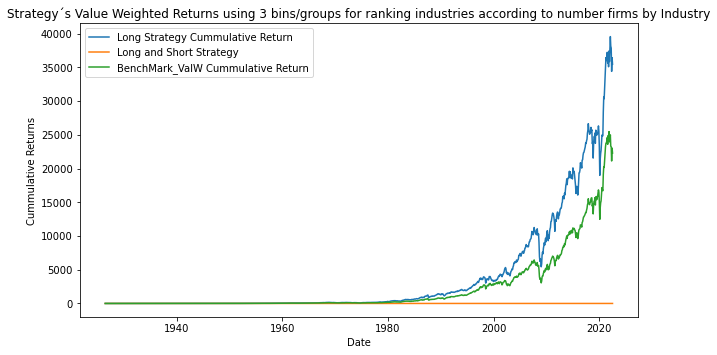

In [9]:
bin_quantity = 3
Ind_Cross_Section_DF['Group_Firms by Industry'] = Ind_Cross_Section_DF.groupby('Date')['Firms by Industry'].transform(lambda x: pd.qcut(x, bin_quantity, labels= False, duplicates = 'drop')) # 
# Creating a return dataframe returns are shifted one period ahead.
firms_by_industry_q_rets_ValueW = pd.pivot_table(Ind_Cross_Section_DF, values='Ret_ValW_Lead1',index='Date',columns='Group_Firms by Industry',aggfunc=np.mean, fill_value=0)
firms_by_industry_q_rets_ValueW['Long Strategy Ret'] = firms_by_industry_q_rets_ValueW[0.0]/100
firms_by_industry_q_rets_ValueW['Long Strategy Cumm Ret'] = firms_by_industry_q_rets_ValueW['Long Strategy Ret'].add(1).cumprod()
firms_by_industry_q_rets_ValueW['Long and Short Strategy Ret'] = (firms_by_industry_q_rets_ValueW[0.0]-firms_by_industry_q_rets_ValueW[(bin_quantity-1)])/100
firms_by_industry_q_rets_ValueW['Long and Short Strategy Cumm Ret'] = firms_by_industry_q_rets_ValueW['Long and Short Strategy Ret'].add(1).cumprod()
# Adding the Benchmark
df_firms_by_industry_q_rets_ValueW = pd.merge(firms_by_industry_q_rets_ValueW ,DF_Monthly_Rets_ValW_BM['BenchMark_ValW_Lead_1'].divide(100),left_index=True,right_index=True,how='left')
# Adding the cummulative benchmark return
df_firms_by_industry_q_rets_ValueW['BenchMark_ValW_Cumm_Ret_Lead_1'] = df_firms_by_industry_q_rets_ValueW['BenchMark_ValW_Lead_1'].add(1).cumprod()
# py plot plots
fig, ax = plt.subplots(figsize=(10, 5.4))
ax.plot(firms_by_industry_q_rets_ValueW.index, firms_by_industry_q_rets_ValueW['Long Strategy Cumm Ret'], label='Long Strategy Cummulative Return')  
ax.plot(firms_by_industry_q_rets_ValueW.index, firms_by_industry_q_rets_ValueW['Long and Short Strategy Cumm Ret'], label='Long and Short Strategy')
ax.plot(firms_by_industry_q_rets_ValueW.index, df_firms_by_industry_q_rets_ValueW['BenchMark_ValW_Cumm_Ret_Lead_1'], label='BenchMark_ValW Cummulative Return')
ax.set_xlabel('Date')  
ax.set_ylabel('Cummulative Returns') 
ax.set_title("Strategy´s Value Weighted Returns using " + str(bin_quantity) + " bins/groups for ranking industries according to number firms by Industry") 
ax.legend();

In [10]:
print('BenchMark_ValW Mean Annual Ret',  df_firms_by_industry_q_rets_ValueW['BenchMark_ValW_Lead_1'].mean()*12,' SD ', df_firms_by_industry_q_rets_ValueW['BenchMark_ValW_Lead_1'].std()*(12**.5), ' Return Risk Ratio ',  (df_firms_by_industry_q_rets_ValueW['BenchMark_ValW_Lead_1'].mean()*12)/(df_firms_by_industry_q_rets_ValueW['BenchMark_ValW_Lead_1'].std()*(12**.5)))    
print('Long Strategy Mean Annual Ret ', firms_by_industry_q_rets_ValueW['Long Strategy Ret'].mean()*12,' SD ',firms_by_industry_q_rets_ValueW['Long Strategy Ret'].std()*(12**.5), ' Return Risk Ratio ', (firms_by_industry_q_rets_ValueW['Long Strategy Ret'].mean()*12)/(firms_by_industry_q_rets_ValueW['Long Strategy Ret'].std()*(12**.5)))                


BenchMark_ValW Mean Annual Ret 0.12532105562498697  SD  0.20446356559877832  Return Risk Ratio  0.6129260988772259
Long Strategy Mean Annual Ret  0.13278528456427535  SD  0.2180467008655375  Return Risk Ratio  0.608976352484048


In [40]:
#The long short strategy underperforms dramatically this is because if the average market return is higher than the spread
#between the highest and lowest group, then the long short strategy will underperform the market, only if the spread was
#higher than the benchmark return the long short strategy would outperform the market benchmark.

In [51]:
# It is evident that as the number of bins increases there is a difference in cummulative returns
# between the Long strategy and the benchmark. The analysis will now explore all the possible number 
# of bins, which is up to 49 bins.

In [52]:
# A table will be created containing the descriptives of each strategy according to number of bins, for all possible
# bin numbers, this is from 1 to 49

In [40]:

data1 = [] 
data2 = []
data3 = []
data4 = []
data5 = []
data6 = []
data7 = []
data8 = []
data9 = []

for i in range (1,50):
    bin_quantity = i 

    Ind_Cross_Section_DF['Group_Firms by Industry'] = Ind_Cross_Section_DF.groupby('Date')['Firms by Industry'].transform(lambda x: pd.qcut(x, bin_quantity, labels= False, duplicates = 'drop')) # 
    # Creating a return dataframe returns are shifted one period ahead.
    firms_by_industry_q_rets_ValueW = pd.pivot_table(Ind_Cross_Section_DF, values='Ret_ValW_Lead1',index='Date',columns='Group_Firms by Industry',aggfunc=np.mean, fill_value=0)
    firms_by_industry_q_rets_ValueW['Long Strategy Ret'] = firms_by_industry_q_rets_ValueW[0.0]/100
    firms_by_industry_q_rets_ValueW['Long Strategy Cumm Ret'] = firms_by_industry_q_rets_ValueW['Long Strategy Ret'].add(1).cumprod()
    firms_by_industry_q_rets_ValueW['Long and Short Strategy Ret'] = (firms_by_industry_q_rets_ValueW[0.0]-firms_by_industry_q_rets_ValueW[(bin_quantity-1)])/100
    firms_by_industry_q_rets_ValueW['Long and Short Strategy Cumm Ret'] = firms_by_industry_q_rets_ValueW['Long and Short Strategy Ret'].add(1).cumprod()
    #Adding the Benchmark
    df_firms_by_industry_q_rets_ValueW = pd.merge(firms_by_industry_q_rets_ValueW ,DF_Monthly_Rets_ValW_BM['BenchMark_ValW_Lead_1'].divide(100),left_index=True,right_index=True,how='left')
    # Adding the cummulative benchmark return
    df_firms_by_industry_q_rets_ValueW['BenchMark_ValW_Cumm_Ret_Lead_1'] = df_firms_by_industry_q_rets_ValueW['BenchMark_ValW_Lead_1'].add(1).cumprod()
    #py plot plots'
    data1.append(i)
    data2.append(firms_by_industry_q_rets_ValueW['Long Strategy Ret'].mean()*12) 
    data3.append(firms_by_industry_q_rets_ValueW['Long Strategy Ret'].std()*(12**.5))
    data4.append((firms_by_industry_q_rets_ValueW['Long Strategy Ret'].mean()*12)/(firms_by_industry_q_rets_ValueW['Long Strategy Ret'].std()*(12**.5)))
    data5.append(df_firms_by_industry_q_rets_ValueW['BenchMark_ValW_Lead_1'].mean()*12) 
    data6.append(df_firms_by_industry_q_rets_ValueW['BenchMark_ValW_Lead_1'].std()*(12**.5)) 
    data7.append((df_firms_by_industry_q_rets_ValueW['BenchMark_ValW_Lead_1'].mean()*12)/(df_firms_by_industry_q_rets_ValueW['BenchMark_ValW_Lead_1'].std()*(12**.5)))
    data8.append(firms_by_industry_q_rets_ValueW['Long Strategy Cumm Ret'].iat[-1])
    data9.append(df_firms_by_industry_q_rets_ValueW['BenchMark_ValW_Cumm_Ret_Lead_1'].iat[-1])


number_of_bins = pd.DataFrame(data1, columns=['Number of categories/bins'])
Long_strat_annual_return  = pd.DataFrame(data2,  columns=['Long Strategy Mean Annual Ret'])    
Long_strat_standard_deviation  = pd.DataFrame(data3,  columns=['Long Strategy Standard Deviation'])    
Long_strat_Return_Risk_Ratio = pd.DataFrame(data4,  columns=['Long Strategy Return Risk Ratio'])    
BM_mean_annual_return  = pd.DataFrame(data5,  columns=['Benchmark Annual Ret'])    
BM_standard_deviation  = pd.DataFrame(data6,  columns=['Benchmark Standard Deviation Ret']) 
BM_Return_Risk_Ratio = pd.DataFrame(data7,  columns=['Benchmark Return Risk Ratio']) 
Strat_Return_from_first_to_last_period =     pd.DataFrame(data8,  columns=['Strategy Total Cummulative Return']) 
BM_Return_from_first_to_last_period =     pd.DataFrame(data9,  columns=['BenchMark Total Cummulative Return']) 
Strategy_returns_table = pd.concat([number_of_bins,Strat_Return_from_first_to_last_period,Long_strat_annual_return,
                                    Long_strat_standard_deviation,Long_strat_Return_Risk_Ratio,BM_Return_from_first_to_last_period,
                                    BM_mean_annual_return,BM_standard_deviation,BM_Return_Risk_Ratio  ], axis=1)


SyntaxError: invalid syntax (<ipython-input-40-c0ecaed2a575>, line 15)

In [17]:
Strategy_returns_table['Strategy Total Cummulative Return'] = Strategy_returns_table['Strategy Total Cummulative Return'].round(decimals = 2)
Strategy_returns_table['BenchMark Total Cummulative Return'] = Strategy_returns_table['BenchMark Total Cummulative Return'].round(decimals = 2)
Strategy_returns_table.round(decimals = 3)
Strategy_returns_table.head(12)



,Number of categories/bins,Strategy Total Cummulative Return,Long Strategy Mean Annual Ret,Long Strategy Standard Deviation,Long Strategy Return Risk Ratio,BenchMark Total Cummulative Return,Benchmark Annual Ret,Benchmark Standard Deviation Ret,Benchmark Return Risk Ratio
0,1,21828.46,0.125123,0.204556,0.611679,22286.7,0.125321,0.204464,0.612926
1,2,24861.80,0.128106,0.212629,0.602485,22286.7,0.125321,0.204464,0.612926
2,3,35454.57,0.132785,0.218047,0.608976,22286.7,0.125321,0.204464,0.612926
3,4,45510.21,0.136047,0.220973,0.615673,22286.7,0.125321,0.204464,0.612926
4,5,54366.43,0.139282,0.229804,0.606092,22286.7,0.125321,0.204464,0.612926
5,6,51305.38,0.139505,0.233764,0.596775,22286.7,0.125321,0.204464,0.612926
6,7,70401.36,0.143734,0.237852,0.604301,22286.7,0.125321,0.204464,0.612926
7,8,75384.09,0.144608,0.238570,0.606143,22286.7,0.125321,0.204464,0.612926
8,9,57685.11,0.142455,0.241214,0.590576,22286.7,0.125321,0.204464,0.612926
9,10,41846.68,0.140469,0.246868,0.569004,22286.7,0.125321,0.204464,0.612926


In [20]:
max_total_return = pd.DataFrame(Strategy_returns_table.iloc[Strategy_returns_table['Strategy Total Cummulative Return'].idxmax()])
max_total_return.round(decimals = 3) 

,7
Number of categories/bins,8.000
Strategy Total Cummulative Return,75384.090
Long Strategy Mean Annual Ret,0.145
Long Strategy Standard Deviation,0.239
Long Strategy Return Risk Ratio,0.606
BenchMark Total Cummulative Return,22286.700
Benchmark Annual Ret,0.125
Benchmark Standard Deviation Ret,0.204
Benchmark Return Risk Ratio,0.613


<h1><center> Analysis in Different Time Periods Multiple Scenarios from 1972 to 2022</center></h1>

In [21]:
bin_quantity = 8

data1 = [] 
data2 = []
data3 = []
data4 = []
data5 = []
data6 = []
data7 = []
data8 = []
data9 = []
data10 = []
data11 = []
data12 = []
data13 = []
investment_scenarios = 0

start_time = time.time()



for i in (5,10,15,20,25,30,40,50,60,92):
    for k in range(0,100,5):
        Ind_Cross_Section_DF = pd.DataFrame()
        df2 = pd.DataFrame()
        for j in industry_dict.items():
            df2 = j[1]
            Ind_Cross_Section_DF =Ind_Cross_Section_DF.append(df2) 
        Ind_Cross_Section_DF['Date'] = pd.to_datetime(Ind_Cross_Section_DF['Date FF'], format="%Y%m") 
        Ind_Cross_Section_DF['Date'] = Ind_Cross_Section_DF['Date'].dt.date       
        Ind_Cross_Section_DF = Ind_Cross_Section_DF.sort_values(by=['Date'])
        Ind_Cross_Section_DF = Ind_Cross_Section_DF.loc[Ind_Cross_Section_DF["Ret_ValW"] != -99.99 ]
        Ind_Cross_Section_DF = Ind_Cross_Section_DF.loc[Ind_Cross_Section_DF["Ret_EqualW"] != -99.99 ]
        Ind_Cross_Section_DF = Ind_Cross_Section_DF.loc[Ind_Cross_Section_DF["Avg Firm Size"] != -99.99 ]
    
        end_date_shift = k
        end_date = 202208 - (end_date_shift*100)
        investment_time_in_years = i
        start_date = end_date - (investment_time_in_years*100)
        Ind_Cross_Section_DF =  Ind_Cross_Section_DF[(Ind_Cross_Section_DF["Date FF"] > start_date) & (Ind_Cross_Section_DF["Date FF"] <= end_date)]
        
        if start_date < 197208:  # Change this value to 192607 to simulate the full sample period and 130 scenarios.
         continue 
        
        investment_scenarios += 1

        Ind_Cross_Section_DF['Group_Firms by Industry'] = Ind_Cross_Section_DF.groupby('Date')['Firms by Industry'].transform(lambda x: pd.qcut(x, bin_quantity, labels= False, duplicates = 'drop')) # 
        # Creating a return dataframe returns are shifted one period ahead.
        firms_by_industry_q_rets_ValueW = pd.pivot_table(Ind_Cross_Section_DF, values='Ret_ValW_Lead1',index='Date',columns='Group_Firms by Industry',aggfunc=np.mean, fill_value=0)
        firms_by_industry_q_rets_ValueW['Long Strategy Ret'] = firms_by_industry_q_rets_ValueW[0.0]/100
        firms_by_industry_q_rets_ValueW['Long Strategy Cumm Ret'] = firms_by_industry_q_rets_ValueW['Long Strategy Ret'].add(1).cumprod()
        firms_by_industry_q_rets_ValueW['Long and Short Strategy Ret'] = (firms_by_industry_q_rets_ValueW[0.0]-firms_by_industry_q_rets_ValueW[(bin_quantity-1)])/100
        firms_by_industry_q_rets_ValueW['Long and Short Strategy Cumm Ret'] = firms_by_industry_q_rets_ValueW['Long and Short Strategy Ret'].add(1).cumprod()
        #Adding the Benchmark
        df_firms_by_industry_q_rets_ValueW = pd.merge(firms_by_industry_q_rets_ValueW ,DF_Monthly_Rets_ValW_BM['BenchMark_ValW_Lead_1'].divide(100),left_index=True,right_index=True,how='left')
        # Adding the cummulative benchmark return
        df_firms_by_industry_q_rets_ValueW['BenchMark_ValW_Cumm_Ret_Lead_1'] = df_firms_by_industry_q_rets_ValueW['BenchMark_ValW_Lead_1'].add(1).cumprod()
        #py plot plots'
        data1.append(bin_quantity)
        data2.append(firms_by_industry_q_rets_ValueW['Long Strategy Ret'].mean()*12) 
        data3.append(firms_by_industry_q_rets_ValueW['Long Strategy Ret'].std()*(12**.5))
        data4.append((firms_by_industry_q_rets_ValueW['Long Strategy Ret'].mean()*12)/(firms_by_industry_q_rets_ValueW['Long Strategy Ret'].std()*(12**.5)))
        data5.append(df_firms_by_industry_q_rets_ValueW['BenchMark_ValW_Lead_1'].mean()*12) 
        data6.append(df_firms_by_industry_q_rets_ValueW['BenchMark_ValW_Lead_1'].std()*(12**.5)) 
        data7.append((df_firms_by_industry_q_rets_ValueW['BenchMark_ValW_Lead_1'].mean()*12)/(df_firms_by_industry_q_rets_ValueW['BenchMark_ValW_Lead_1'].std()*(12**.5)))
        data8.append(firms_by_industry_q_rets_ValueW['Long Strategy Cumm Ret'].iat[-1])
        data9.append(df_firms_by_industry_q_rets_ValueW['BenchMark_ValW_Cumm_Ret_Lead_1'].iat[-1])
        data10.append(start_date)
        data11.append(investment_time_in_years)
        data12.append(end_date)
        data13.append((firms_by_industry_q_rets_ValueW['Long Strategy Cumm Ret'].iat[-1])/(df_firms_by_industry_q_rets_ValueW['BenchMark_ValW_Cumm_Ret_Lead_1'].iat[-1])-1)


        number_of_bins = pd.DataFrame(data1, columns=['Number of categories/bins'])
        Long_strat_annual_return  = pd.DataFrame(data2,  columns=['Long Strategy Mean Annual Ret'])    
        Long_strat_standard_deviation  = pd.DataFrame(data3,  columns=['Long Strategy Standard Deviation'])    
        Long_strat_Return_Risk_Ratio = pd.DataFrame(data4,  columns=['Long Strategy Return Risk Ratio'])    
        BM_mean_annual_return  = pd.DataFrame(data5,  columns=['Benchmark Annual Ret'])    
        BM_standard_deviation  = pd.DataFrame(data6,  columns=['Benchmark Standard Deviation Ret']) 
        BM_Return_Risk_Ratio = pd.DataFrame(data7,  columns=['Benchmark Return Risk Ratio']) 
        Strat_Return_from_first_to_last_period =     pd.DataFrame(data8,  columns=['Strategy Total Cummulative Return']) 
        BM_Return_from_first_to_last_period =     pd.DataFrame(data9,  columns=['BenchMark Total Cummulative Return'])

        start_date_df =     pd.DataFrame(data10,  columns=['Investment Start Date']) 
        start_date_df['Investment Start Date'] = pd.to_datetime(start_date_df['Investment Start Date'], format="%Y%m") 
        investment_years_df =     pd.DataFrame(data11,  columns=['Investment Period in Years']) 
        end_date_df =     pd.DataFrame(data12,  columns=['Investment End Date']) 
        end_date_df['Investment End Date'] = pd.to_datetime(end_date_df['Investment End Date'], format="%Y%m") 
        strat_performance_vs_benchmark =  pd.DataFrame(data13,  columns=['Strategy Return Performance vs Benchmark Return'])
        strat_performance_vs_benchmark['Strategy Return Performance vs Benchmark Return'] = strat_performance_vs_benchmark['Strategy Return Performance vs Benchmark Return'].astype(float).map("{:.2%}".format)
        Strategy_returns_table = pd.concat([number_of_bins,start_date_df,end_date_df,investment_years_df,strat_performance_vs_benchmark ,Strat_Return_from_first_to_last_period,Long_strat_annual_return,
                                    Long_strat_standard_deviation,Long_strat_Return_Risk_Ratio,BM_Return_from_first_to_last_period,
                                    BM_mean_annual_return,BM_standard_deviation,BM_Return_Risk_Ratio  ], axis=1)
end_time = time.time()

In [23]:
investment_scenarios

49

In [24]:
print(start_time)
print(end_time)
print(end_time - start_time)

1667450420.2013998
1667450501.6901803
81.48878049850464


In [32]:
Strategy_returns_table_sorted = Strategy_returns_table.sort_values(by=['Investment Start Date'], ascending=False)

In [35]:
Strategy_returns_table_sorted

,Number of categories/bins,Investment Start Date,Investment End Date,Investment Period in Years,Strategy Return Performance vs Benchmark Return,Strategy Total Cummulative Return,Long Strategy Mean Annual Ret,Long Strategy Standard Deviation,Long Strategy Return Risk Ratio,BenchMark Total Cummulative Return,Benchmark Annual Ret,Benchmark Standard Deviation Ret,Benchmark Return Risk Ratio
0,8,2017-08-01,2022-08-01,5,3.43%,1.666344,0.118563,0.169501,0.699486,1.611031,0.115933,0.192881,0.601060
10,8,2012-08-01,2022-08-01,10,-10.14%,2.773889,0.115327,0.155483,0.741733,3.086847,0.126212,0.154911,0.814738
1,8,2012-08-01,2017-08-01,5,-13.12%,1.664656,0.112145,0.141792,0.790913,1.916069,0.136320,0.106794,1.276478
19,8,2007-08-01,2022-08-01,15,17.98%,4.208144,0.112408,0.176818,0.635726,3.566913,0.102543,0.183278,0.559496
11,8,2007-08-01,2017-08-01,10,14.06%,2.525376,0.109381,0.180998,0.604325,2.214056,0.095960,0.179168,0.535585
2,8,2007-08-01,2012-08-01,5,31.29%,1.517056,0.106618,0.214405,0.497274,1.155520,0.055600,0.230360,0.241362
12,8,2002-08-01,2012-08-01,10,85.42%,5.072345,0.180341,0.183717,0.981626,2.735540,0.117229,0.178908,0.655246
20,8,2002-08-01,2017-08-01,15,61.09%,8.443708,0.157609,0.170739,0.923100,5.241484,0.123592,0.158256,0.780964
27,8,2002-08-01,2022-08-01,20,66.62%,14.070119,0.147970,0.170148,0.869656,8.444192,0.121702,0.167044,0.728561
3,8,2002-08-01,2007-08-01,5,41.23%,3.343545,0.254065,0.145552,1.745528,2.367367,0.178858,0.104160,1.717143


In [33]:
Strategy_returns_table['Strategy Return Performance vs Benchmark Return'].str.rstrip('%').astype(float).mean()

76.50224489795919

In [34]:
#Proposed follow up. obtain a table for ['Strategy Return Performance vs Benchmark Return'] for each bin possiblity, 2-49
# that would be 130 time scenarios times 48 bin combinations = 6240 simulations, each bin simulation takes 107 seconds , run time 
# for all bin combinations would be 85 minutes.